
Using FCFS:
Moving from 20 to 10 -> Movement: 10
Moving from 10 to 22 -> Movement: 12
Moving from 22 to 20 -> Movement: 2
Moving from 20 to 2 -> Movement: 18
Moving from 2 to 40 -> Movement: 38
Moving from 40 to 6 -> Movement: 34
Moving from 6 to 38 -> Movement: 32

Total movement: 146 tracks
Total seek time: 876 msec


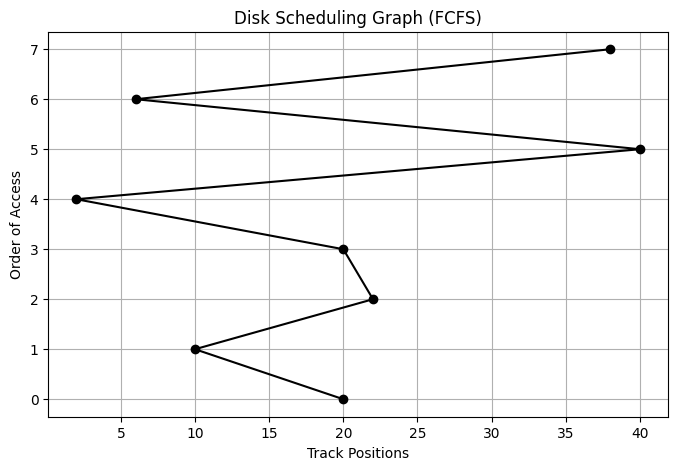


Using SCAN:
SCAN Total Seek Time: 414 msec


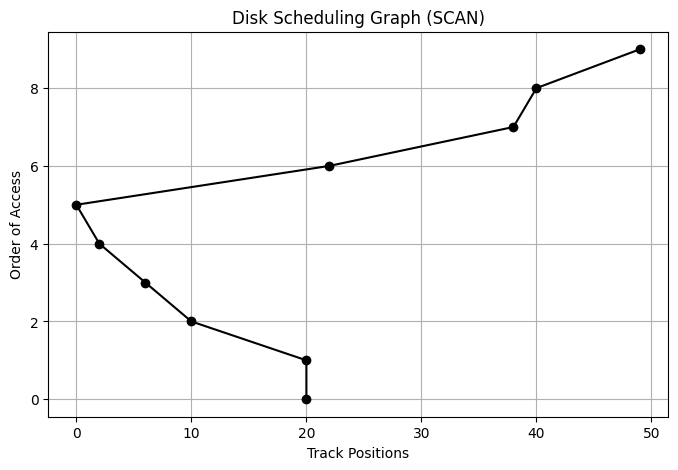


Using LOOK:
LOOK Total Seek Time: 336 msec


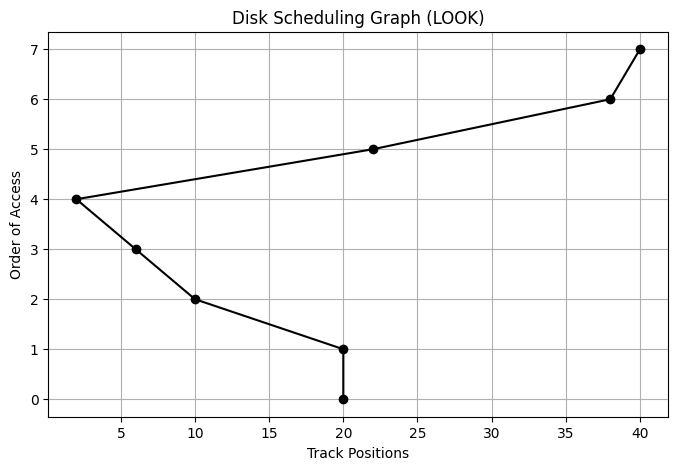


Using C-SCAN:
C-SCAN Total Seek Time: 588 msec


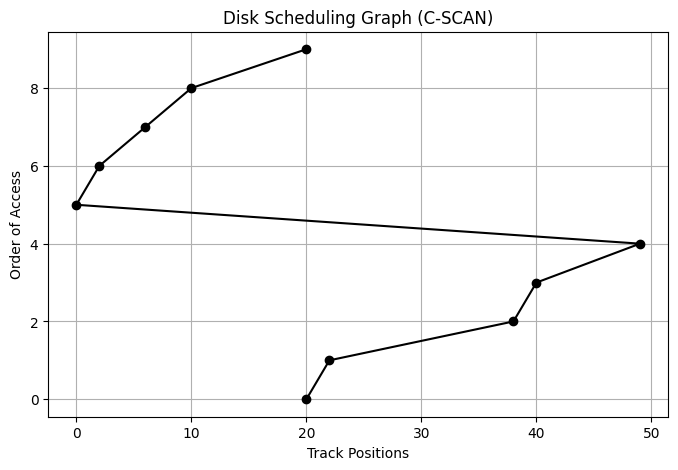

In [6]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# FCFS Algorithm
def fcfs(requests, head, seek_time):
    print("\nUsing FCFS:")
    total_tracks = 0
    order_of_access = [head]  # Include the starting position

    for request in requests:
        movement = abs(request - head)
        print(f"Moving from {head} to {request} -> Movement: {movement}")
        total_tracks += movement
        order_of_access.append(request)
        head = request

    total_seek_time = total_tracks * seek_time
    print(f"\nTotal movement: {total_tracks} tracks")
    print(f"Total seek time: {total_seek_time} msec")
    return order_of_access, total_seek_time

# SCAN Algorithm
def scan(requests, head, disk_size, seek_time):
    print("\nUsing SCAN:")
    sorted_requests = sorted(requests + [0, disk_size - 1])
    below = [r for r in sorted_requests if r <= head]
    above = [r for r in sorted_requests if r > head]
    order = below[::-1] + above

    total_tracks = sum(abs(order[i] - order[i - 1]) for i in range(1, len(order)))
    total_seek_time = total_tracks * seek_time
    print(f"SCAN Total Seek Time: {total_seek_time} msec")
    return [head] + order, total_seek_time

# LOOK Algorithm
def look(requests, head, seek_time):
    print("\nUsing LOOK:")
    sorted_requests = sorted(requests)
    below = [r for r in sorted_requests if r <= head]
    above = [r for r in sorted_requests if r > head]
    order = below[::-1] + above

    total_tracks = sum(abs(order[i] - order[i - 1]) for i in range(1, len(order)))
    total_seek_time = total_tracks * seek_time
    print(f"LOOK Total Seek Time: {total_seek_time} msec")
    return [head] + order, total_seek_time

# C-SCAN Algorithm
def c_scan(requests, head, disk_size, seek_time):
    print("\nUsing C-SCAN:")
    sorted_requests = sorted(requests + [0, disk_size - 1])
    above = [r for r in sorted_requests if r > head]
    below = [r for r in sorted_requests if r <= head]
    order = above + below

    total_tracks = abs(disk_size - 1 - head) + abs(disk_size - 1 - 0) + max(below)
    total_seek_time = total_tracks * seek_time
    print(f"C-SCAN Total Seek Time: {total_seek_time} msec")
    return [head] + order, total_seek_time

# Plot Graph
def plot_graph(order, title):
    x_values = order
    y_values = list(range(len(order)))  # Order of access (sequential)
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='black')
    plt.title(title)
    plt.xlabel("Track Positions")
    plt.ylabel("Order of Access")
    plt.grid()
    plt.show()

# Input Parameters
requests = [10, 22, 20, 2, 40, 6, 38]
head = 20
seek_time = 6
disk_size = 50  # Disk size for SCAN and C-SCAN

# Run and Plot FCFS
fcfs_order, fcfs_seek = fcfs(requests, head, seek_time)
plot_graph(fcfs_order, "Disk Scheduling Graph (FCFS)")

# Run and Plot SCAN
scan_order, scan_seek = scan(requests, head, disk_size, seek_time)
plot_graph(scan_order, "Disk Scheduling Graph (SCAN)")

# Run and Plot LOOK
look_order, look_seek = look(requests, head, seek_time)
plot_graph(look_order, "Disk Scheduling Graph (LOOK)")

# Run and Plot C-SCAN
c_scan_order, c_scan_seek = c_scan(requests, head, disk_size, seek_time)
plot_graph(c_scan_order, "Disk Scheduling Graph (C-SCAN)")
